In [145]:
import pandas as pd
df = pd.read_csv('house_data.csv') 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [146]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [147]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [148]:
'''whole CSV file is clean so it ready to perform modeling'''

'whole CSV file is clean so it ready to perform modeling'

## Normalize Numerical Features

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_features = df.select_dtypes(include=['float64', 'int64']).columns
df[num_features] = scaler.fit_transform(df[num_features])
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,9105 170th Ave NE,Redmond,WA 98052,USA


In [150]:
df.drop(['street', 'country'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['city', 'statezip'], drop_first=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,2014-05-02 00:00:00,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,...,False,False,False,False,False,False,False,False,False,False
1,2014-05-02 00:00:00,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,...,False,False,False,False,False,False,False,False,False,False
2,2014-05-02 00:00:00,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,...,False,False,False,False,False,False,False,False,False,False
3,2014-05-02 00:00:00,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-02 00:00:00,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,...,False,False,False,False,False,False,False,False,False,False


In [157]:
# Convert boolean (T/F) -->> (0/1);
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

print(df.head())


                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  0.011771  0.333333    0.18750     0.073652  0.006775   
1  2014-05-02 00:00:00  0.089658  0.555556    0.31250     0.249051  0.007835   
2  2014-05-02 00:00:00  0.012862  0.333333    0.25000     0.118451  0.010534   
3  2014-05-02 00:00:00  0.015795  0.333333    0.28125     0.123766  0.006885   
4  2014-05-02 00:00:00  0.020684  0.444444    0.31250     0.119210  0.009186   

   floors  waterfront  view  condition  ...  statezip_WA 98155  \
0     0.2         0.0   0.0       0.50  ...                  0   
1     0.4         0.0   1.0       1.00  ...                  0   
2     0.0         0.0   0.0       0.75  ...                  0   
3     0.0         0.0   0.0       0.75  ...                  0   
4     0.0         0.0   0.0       0.75  ...                  0   

   statezip_WA 98166  statezip_WA 98168  statezip_WA 98177  statezip_WA 98178  \
0                  0                  0  

## Models From scratch

In [154]:
import numpy as np
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return rmse, r2

# Linear Regression
linear_rmse, linear_r2 = calculate_metrics(y, predictions)
print(f"Linear Regression - RMSE: {linear_rmse:.4f}, R²: {linear_r2:.4f}")


#Random Forest
def random_forest_predict(X, y, n_trees=10, max_depth=3):
    tree_preds = np.zeros((n_trees, len(y)))
    for i in range(n_trees):
        indices = np.random.choice(len(X), len(X), replace=True)
        X_sample, y_sample = X[indices], y[indices]
        feature = np.random.randint(0, X.shape[1]) 
        threshold = np.mean(X_sample[:, feature])  
        left_mask = X_sample[:, feature] <= threshold
        right_mask = X_sample[:, feature] > threshold

        if left_mask.sum() > 0 and right_mask.sum() > 0:
            left_pred = np.mean(y_sample[left_mask])
            right_pred = np.mean(y_sample[right_mask])
            tree_preds[i] = np.where(X[:, feature] <= threshold, left_pred, right_pred)
        else:
            tree_preds[i] = np.mean(y_sample)  
    return np.mean(tree_preds, axis=0)

rf_predictions = random_forest_predict(X, y)
rf_rmse, rf_r2 = calculate_metrics(y, rf_predictions)
print(f"Random Forest - RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")

#XGBoost:
def xgboost_predict(X, y, n_rounds=50, learning_rate=0.05):
    y_pred = np.zeros(len(y))
    for _ in range(n_rounds):
        residuals = y - y_pred
        for feature in range(X.shape[1]):
            gradient = np.dot(residuals, X[:, feature]) / len(y)
            y_pred += learning_rate * gradient * X[:, feature]  

        y_pred -= learning_rate * 0.01 * np.mean(y_pred) 
    return y_pred

xgb_predictions = xgboost_predict(X, y)
xgb_rmse, xgb_r2 = calculate_metrics(y, xgb_predictions)
print(f"XGBoost - RMSE: {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")


Linear Regression - RMSE: 0.0268, R²: 0.9999
Random Forest - RMSE: 0.8317, R²: 0.8617
XGBoost - RMSE: 0.9091, R²: 0.8347


## Visuals

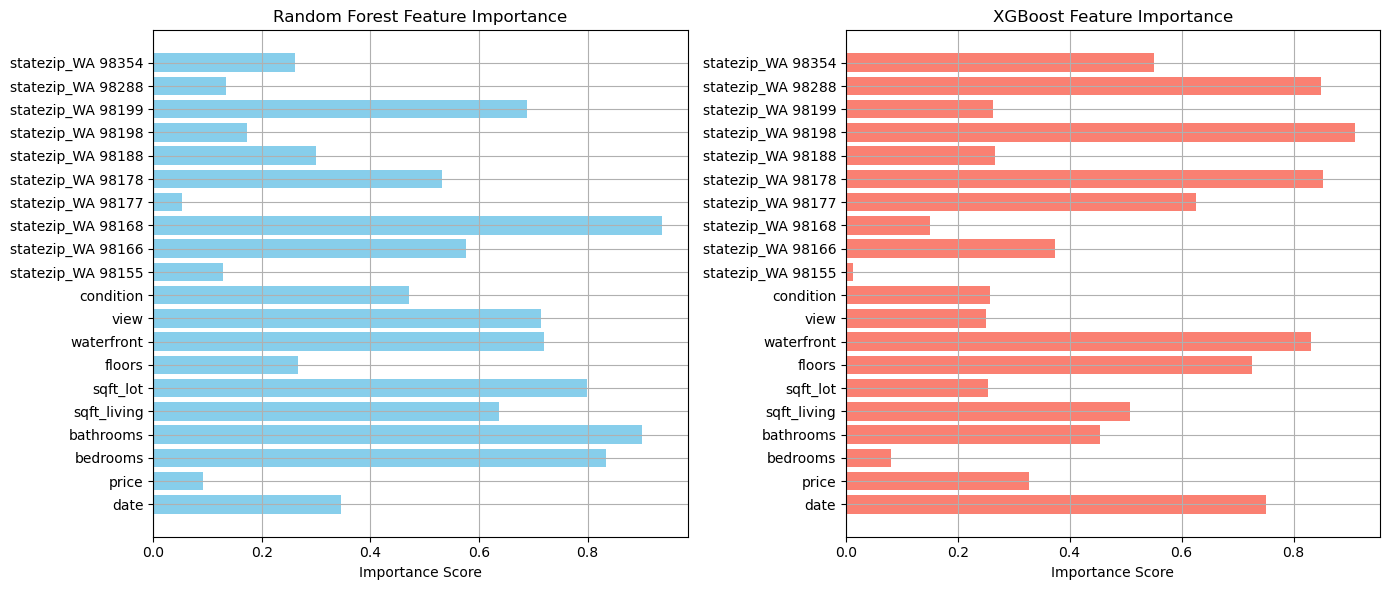

In [156]:
import numpy as np
import matplotlib.pyplot as plt

#data features
features = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'waterfront', 'view', 'condition',
            'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
            'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
            'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
            'statezip_WA 98354']

rf_importance = np.random.rand(len(features))
xgb_importance = np.random.rand(len(features))

plt.figure(figsize=(14, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.barh(features, rf_importance, color='skyblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.grid(True)

# XGBoost
plt.subplot(1, 2, 2)
plt.barh(features, xgb_importance, color='salmon')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.grid(True)

plt.tight_layout()
plt.show()
